# Classification in Tensorflow

Create data

In [1]:
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [3]:
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(X,y, columns = ['x1', 'x2'])

In [7]:
df['label'] = y

In [8]:
df

,x1,x2,label
1,0.754246,0.231481,1
1,-0.756159,0.153259,1
1,-0.815392,0.173282,1
1,-0.393731,0.692883,1
0,0.442208,-0.896723,0
...,...,...,...
0,0.244054,0.944125,0
0,-0.978655,-0.272373,0
1,-0.136900,-0.810012,1
0,0.670362,-0.767502,0


In [9]:
import matplotlib.pyplot as plt

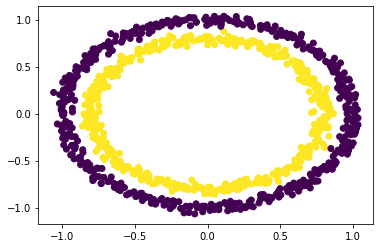

In [10]:
plt.scatter(X[:,0], X[:,1], c = y)

### Model Building

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.Sequential()

In [13]:
model.add(tf.keras.layers.Dense(10, input_shape = (X.shape[1], )))
model.add(tf.keras.layers.Dense(20, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [14]:
model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = 'SGD',
              metrics = ['accuracy'])

In [15]:
model.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.8296 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5150
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.5390
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6380
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.7000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6950
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.8170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6331 - accuracy: 0.8110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.8180
Epoch 11/

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()


doing binary classification


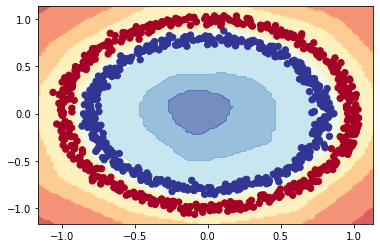

In [18]:
plot = plot_decision_boundary(model, X, y)

In [19]:
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

In [20]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_regression[:150], X_regression[150:], y_regression[:150], y_regression[150:]

In [21]:
model_3 = tf.keras.Sequential()

In [22]:
model_3.add(tf.keras.layers.Dense(100, input_shape = (1,)))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))



In [23]:
model_3.compile(loss = 'mae', optimizer='adam', metrics = ['mae'])

In [24]:
model_3.fit(X_reg_train, y_reg_train, epochs = 10)

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 405.0747 - mae: 405.0747
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 281.0164 - mae: 281.0164
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 156.2975 - mae: 156.2975
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 56.5858 - mae: 56.5858
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 84.7189 - mae: 84.7189
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 81.1889 - mae: 81.1889
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 49.4789 - mae: 49.4789
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 50.0112 - mae: 50.0112
Epoch 9/10
5/5 [==============================] - 0s 12ms/step - loss: 43.7424 - mae: 43.7424
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 45.0814 - mae: 45.0814


In [25]:
preds = model_3.predict(X_reg_test)

In [26]:
y_reg_test.shape

TensorShape([50])

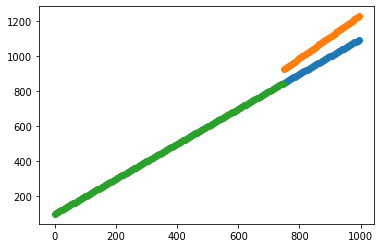

In [27]:
plt.Figure()
plt.scatter(X_reg_test, y_reg_test)
plt.scatter(X_reg_test, preds)
plt.scatter(X_reg_train, y_reg_train)

In [28]:
n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [29]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [30]:
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

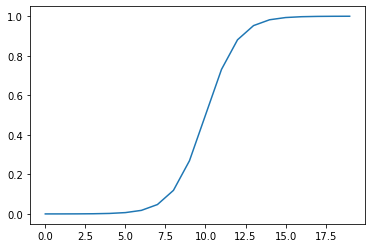

In [31]:
plt.plot(sigmoid(A))

In [32]:
def relu(x):
  return tf.maximum(0, x)

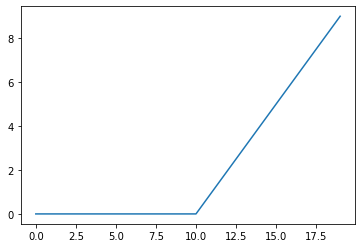

In [33]:
plt.plot(relu(A))

Tweaking learning rate

In [34]:
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [35]:
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [36]:
model_4 = tf.keras.Sequential()

model_4.add(tf.keras.layers.Dense(4, input_shape = (2,)))
model_4.add(tf.keras.layers.Dense(4, activation='relu'))
model_4.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_4.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_4.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),  metrics = 'accuracy')

In [37]:
history = model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5638
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6475
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6988
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7000
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7625
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5634 - accuracy: 0.7387
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7775
Epoch 11/

In [38]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_5 = tf.keras.Sequential()

In [40]:
model_5.add(tf.keras.layers.Dense(4, input_shape = (2,)))
model_5.add(tf.keras.layers.Dense(4, activation='relu'))
model_5.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_5.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model_5.compile(loss = 'binary_crossentropy', optimizer = 'Adam',  metrics = 'accuracy')

In [41]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

In [42]:
history = model_5.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5225 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5300 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5312 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

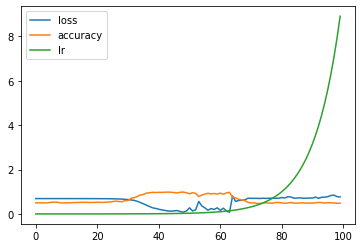

In [43]:
pd.DataFrame(history.history).plot()

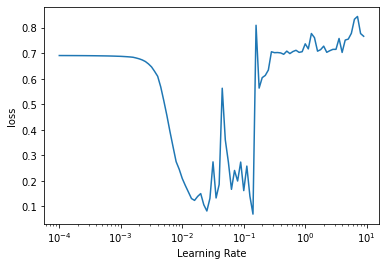

In [44]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.show()

## Multiclass Classification

In [45]:
from tensorflow.keras.datasets import fashion_mnist

In [46]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [48]:
train_data.shape

(60000, 28, 28)

In [49]:
train_labels[0]

9

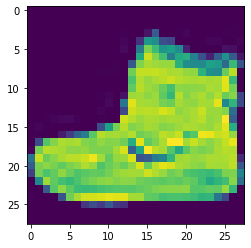

In [50]:
plt.imshow(train_data[0])

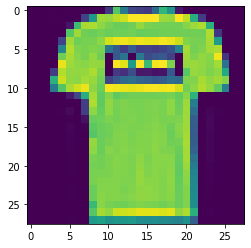

In [51]:
plt.imshow(train_data[1])

In [58]:
model_6 = tf.keras.Sequential()

model_6.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model_6.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_6.add(tf.keras.layers.Dense(4, activation = 'relu'))
model_6.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_6.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [59]:
model_6.fit(train_data, train_labels, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9339 - accuracy: 0.2263
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6978 - accuracy: 0.2795
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6462 - accuracy: 0.2840
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6237 - accuracy: 0.2962
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6070 - accuracy: 0.3052
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5945 - accuracy: 0.3169
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5842 - accuracy: 0.3206
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5771 - accuracy: 0.3258
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5708 - accuracy: 0.3264
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 1.566

In [60]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Normalise data

In [61]:
train_data_norm = train_data/255
test_data_norm = test_data/255

In [62]:
model_6.fit(train_data_norm, train_labels, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1851 - accuracy: 0.2367
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4774 - accuracy: 0.3651
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4512 - accuracy: 0.3859
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4334 - accuracy: 0.3963
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4149 - accuracy: 0.4066
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3941 - accuracy: 0.4168
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3806 - accuracy: 0.4215
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3716 - accuracy: 0.4246
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3652 - accuracy: 0.4260
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 1.360

In [64]:
len(test_data)

10000

In [66]:
preds = model_6.predict(test_data_norm).round()

In [67]:
preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
np.argmax(preds, axis = 1)

array([7, 0, 0, ..., 8, 0, 0])

In [72]:
from sklearn.metrics import confusion_matrix

In [70]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)
  
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [74]:
weights, biases = model_6.layers[1].get_weights()

In [76]:
weights.shape

(784, 4)

In [77]:
biases

array([-0.02613996,  6.094736  , -0.0177981 , -0.02596525], dtype=float32)